### We are making this neural network, because we are trying to classify clothes from 0 to 9, using a dataset called fashion MNIST, that consists of 60000 images that are 28 by 28 pixels. The dataset contains one label for each image, specifying the clothes we are seeing in each image. We say that there are 10 classes, since we have 10 labels.

LABELS = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot", }

In [3]:
import numpy as np
from numpy import genfromtxt
from matplotlib import pyplot as plt 

In [4]:
train_data = genfromtxt('./Fashion-MNIST/trainData.csv', delimiter=',')
train_label = genfromtxt('./Fashion-MNIST/trainLabels.csv', delimiter=',')
test_data = genfromtxt('./Fashion-MNIST/testData.csv', delimiter=',')
test_label = genfromtxt('./Fashion-MNIST/testLabels.csv', delimiter=',')
m_train = train_data.shape[0]
m_test = test_data.shape[0]

In [6]:
print("train_data shape: " + str(train_data.shape))
print("train_label shape: " + str(train_label.shape))
print("test_data shape: " + str(test_data.shape))
print("test_label shape: " + str(test_label.shape))
print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))

train_data shape: (60000, 784)
train_label shape: (60000,)
test_data shape: (10000, 784)
test_label shape: (10000,)
Number of training examples: m_train = 60000
Number of testing examples: m_test = 10000


In [7]:
np.histogram(train_label) 
hist,bins = np.histogram(train_label) 
print (hist) 

[6000 6000 6000 6000 6000 6000 6000 6000 6000 6000]


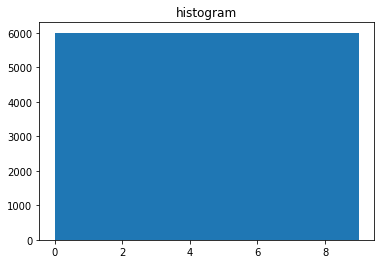

In [8]:
plt.hist(train_label) 
plt.title("histogram") 
plt.show()

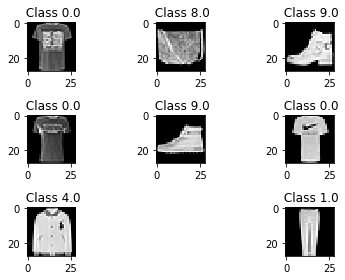

In [9]:
# random check with nine training examples
np.random.seed(2);
indices = list(np.random.randint(m_train,size=9))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(train_data[indices[i]].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(" Class {}".format(train_label[indices[i]]))
    plt.tight_layout()

In [10]:
print("Feature Values: \nFrom " + str(np.min(train_data)) + " to " + str(np.max(train_data)))
print("Data type: " + str(train_data.dtype))
print("\nLabel Values: ")
print(set(list(train_label)))
print("Data type: " + str(train_label.dtype))

Feature Values: 
From 0.0 to 255.0
Data type: float64

Label Values: 
{0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0}
Data type: float64


In [11]:
train_data = train_data / 255

In [12]:
print("Feature Values: \nFrom " + str(np.min(train_data)) + " to " + str(np.max(train_data)))
print("Data type: " + str(train_data.dtype))
print("\nLabel Values: ")
print(set(list(train_label)))
print("Data type: " + str(train_label.dtype))

Feature Values: 
From 0.0 to 1.0
Data type: float64

Label Values: 
{0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0}
Data type: float64


In [13]:
LABELS = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot", }

# Dataloader

### Now we have to load the dataset and preprocess it. We have done normalization by dividing all images by 255, and make it such that all images have values between 0 and 1, since this removes some of the numerical stability issues with activation functions later on. We choose to go with one-hot encoded labels, since we can more easily subtract these labels from the output of the neural network.

In [14]:
class Dataloader:
    
    def __init__(self, data, labels, n_classes, batch_size=None, shuffle=False):

        assert len(data)==len(labels)
        self.__n_classes = n_classes
        self.__batch_size = batch_size
        self.__shuffle = shuffle
        self.__data = data
        self.__onehot_labels = self.__onehot(labels, self.__n_classes)
    
    def __onehot(self, labels, n_classes):
        onehot_vectors = np.eye(n_classes)[np.array(labels).reshape(-1)]
        return onehot_vectors.reshape(list(labels.shape)+[n_classes])     
    
    def get_onehot(self):
        return self.__onehot_labels


    def __shuffle_dataset(self):
        # Implemet
        pass

    def __iter__(self):
        
        if self.__shuffle:
            self.__shuffle_dataset()
            
        if self.__batch_size==None:
            yield (np.matrix(self.__data), np.matrix(self.__onehot_labels))
            return
            
        for idx in range(0, len(self.__data), self.__batch_size):
            yield (np.matrix(self.__data[idx:idx+self.__batch_size]), 
                   np.matrix(self.__onehot_labels[idx:idx+self.__batch_size]))

In [15]:
int_array_of_train_label = train_label.astype(int)
print(int_array_of_train_label)

[9 0 0 ... 3 0 5]


In [17]:
int_array_of_test_label = test_label.astype(int)
print(int_array_of_test_label)

[9 2 1 ... 8 1 5]


In [18]:
dataloader = Dataloader(train_data , int_array_of_train_label , 10 )

In [19]:
dataloader.get_onehot()

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### Neurons make up an Artificial Neural Network and a Neuron can be visualized as something that is holding a number which comes from the ending branches (Synapses) supplied at that Neuron, what happens is for a Layer of Neural Network we multiply the input to the Neuron with the weight held by that synapse and sum all of those up. ###

### For example , if the weights are w1, w2, w3 …. wN and inputs being i1, i2, i3 …. iN we get a summation of : w1*i1 + w2*i2 + w3*i3 …. wN*iN ###

<img src="./images/activation.png" />

### For several layers of Neural Networks and Connections we can have varied values of wX and iX and the summation S which varies according to whether the particular Neuron is activated or not, so to normalize this and prevent drastically different range of values, we use what is called a Activation Function for Neural networks that turns these values into something equivalent between 0,1 or -1,1 to make the whole process statistically balanced. ###

### The purpose of the activation function is to introduce non-linearity into the output of a neuron.

### A neural network without an activation function is essentially just a linear regression model. The activation function does the non-linear transformation to the input making it capable to learn and perform more complex tasks.

### The Activation Functions can be basically divided into 2 types:
<ul>
      <li> Linear Activation Function 
      <li> Non-linear Activation Functions 
<ul/>

### When the activation function is non-linear, then a two-layer neural network can be proven to be a universal function approximator. The identity activation function does not satisfy this property. When multiple layers use the identity activation function, the entire network is equivalent to a single-layer model. 

### When the range of the activation function is finite, gradient-based training methods tend to be more stable, because pattern presentations significantly affect only limited weights. When the range is infinite, training is generally more efficient because pattern presentations significantly affect most of the weights. In the latter case, smaller learning rates are typically necessary.

### Continuously differentiable — This property is desirable (ReLU is not continuously differentiable and has some issues with gradient-based optimization, but it is still possible) for enabling gradient-based optimization methods. The binary step activation function is not differentiable at 0, and it differentiates to 0 for all other values, so gradient-based methods can make no progress with it.

### Derivative or Differential or Slope: Change in y-axis according to change in x-axis.

### Monotonic — When the activation function is monotonic, the error surface associated with a single-layer model is guaranteed to be convex.

### Monotonic function: A function which is either entirely non-increasing or non-decreasing.

### Approximates identity near the origin — When activation functions have this property, the neural network will learn efficiently when its weights are initialized with small random values. When the activation function does not approximate identity near the origin, special care must be used when initializing the weights.

## Sigmoid or Logistic Activation Function
The Sigmoid Function curve looks like a S-shape.

<img src="./images/sigmoid.png" />

### The main reason why we use sigmoid function is because it exists between (0 to 1). Therefore, it is especially used for models where we have to predict the probability as an output.Since probability of anything exists only between the range of 0 and 1, sigmoid is the right choice.
### The function is differentiable.That means, we can find the slope of the sigmoid curve at any two points.
### The function is monotonic but function’s derivative is not.
### The logistic sigmoid function can cause a neural network to get stuck at the training time.
### The softmax function is a more generalized logistic activation function which is used for multiclass classification.

## Tanh or hyperbolic tangent Activation Function

<img src="./images/tanh.jpeg" />

### tanh is also like logistic sigmoid but better. The range of the tanh function is from (-1 to 1). tanh is also sigmoidal (s - shaped).
### The advantage is that the negative inputs will be mapped strongly negative and the zero inputs will be mapped near zero in the tanh graph.
### The function is differentiable.
### The function is monotonic while its derivative is not monotonic.
### The tanh function is mainly used classification between two classes.
### Both tanh and logistic sigmoid activation functions are used in feed-forward nets.

## ReLU (Rectified Linear Unit) Activation Function

<img src="./images/relu.png" />

### the ReLU is half rectified (from bottom). f(z) is zero when z is less than zero and f(z) is equal to z when z is above or equal to zero.
### Range: [ 0 to infinity)
### The function and its derivative both are monotonic.
### But the issue is that all the negative values become zero immediately which decreases the ability of the model to fit or train from the data properly. That means any negative input given to the ReLU activation function turns the value into zero immediately in the graph, which in turns affects the resulting graph by not mapping the negative values appropriately.

 ## Leaky ReLU

<img src="./images/leaky-relu.jpeg" />

### It is an attempt to solve the dying ReLU problem
### The leak helps to increase the range of the ReLU function. Usually, the value of a is 0.01 or so.
### When a is not 0.01 then it is called Randomized ReLU.
### Therefore the range of the Leaky ReLU is (-infinity to infinity).
### Both Leaky and Randomized ReLU functions are monotonic in nature. Also, their derivatives also monotonic in nature.

### Why derivative/differentiation is used ?
### When updating the curve, to know in which direction and how much to change or update the curve depending upon the slope.That is why we use differentiation in almost every part of Machine Learning and Deep Learning.

-------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Activation Functions

In [20]:
class Identical:
    
    def __init__(self): pass
    
    def __val(self, matrix):
        identical_value = np.matrix(matrix, dtype=float)
        return identical_value

    def derivative(self, matrix):
        temp = np.matrix(matrix, dtype=float)
        identical_derivative = np.matrix(np.full(np.shape(temp), 1.))
        return identical_derivative
    
    def __call__(self, matrix):
        return self.__val(matrix)
    

class Relu:
    
    def __init__(self): pass
    
    def __relu(self, matrix):
        relu_value = np.maximum(0,matrix)
        return relu_value

    def derivative(self, matrix):
        relu_derivative = np.matrix(matrix, dtype=float)
        relu_derivative[relu_derivative<=0] = 0
        relu_derivative[relu_derivative>0] = 1
        return relu_derivative
    
    def __call__(self, matrix):
        return self.__relu(matrix)

    
class LeakyRelu:
    
    def __init__(self, negative_slope=0.01):
        self.negative_slope = 0.01
    
    def __val(self, matrix):
        # first approach                           
        # leaky_way = np.where(matrix > 0, matrix, matrix * 0.01)                          

        # second approach                                                                   
        y1 = ((matrix > 0) * matrix)                                                 
        y2 = ((matrix <= 0) * matrix * 0.01)                                         
        leacky_relu_value = y1 + y2  
        return leacky_relu_value

    def derivative(self, matrix):
        leacky_relu_derivative = np.ones_like(matrix)
        leacky_relu_derivative[matrix < 0] = alpha
        return leacky_relu_derivative
    
    def __call__(self, matrix):
        return self.__val(matrix)

    
class Sigmoid:
    
    def __init__(self): pass

    def __val(self, matrix):
        sigmoid_value = 1/(1+np.exp(-matrix))
        return sigmoid_value

    def derivative(self, matrix):
        sigmoid_value = self.__val(self, matrix)
        sigmoid_derivative = sigmoid_value * (1 - sigmoid_value)
        return sigmoid_derivative
    
    def __call__(self, matrix):
        return self.__val(matrix)


class Softmax:
    
    def __init__(self): pass

    def __val(self, matrix):
        expo = np.exp(matrix-np.max(matrix))
        expo_sum = np.sum(expo)
        softmax_value = expo/expo_sum
        return softmax_value

    def derivative(self, matrix):
        S = self.__val(matrix)
        S_vector = S.reshape(S.shape[0],1)
        S_matrix = np.tile(S_vector,S.shape[0])
        softmax_derivative = np.diag(S) - (S_matrix * np.transpose(S_matrix))

        return softmax_derivative
    
    def __call__(self, matrix):
        return self.__val(matrix)

# Loss Function

In [21]:
class CrossEntropy: #(with softmax)
    
    def __init__(self): pass

    def __val(self, true_val, expected_val):
        assert np.shape(true_val)==np.shape(expected_val)

        """
        X is the output from fully connected layer (num_examples x num_classes)
        y is labels (num_examples x 1)
            Note that y is not one-hot encoded vector. 
            It can be computed as y.argmax(axis=1) from one-hot encoded vectors of labels if required.
        """
        m = expected_val.argmax(axis=1).shape[0]
        p = Softmax().__cal__(true_val)     # We use multidimensional array indexing to extract 
        
        log_likelihood = -np.log(p[range(m),expected_val.argmax(axis=1)])
        cross_entropy_value = np.sum(log_likelihood) / m

        return cross_entropy_value
        
    def derivative(self, true_val, expected_val):
        #print(np.shape(true_val))
        #print(np.shape(expected_val))
        assert np.shape(true_val)==np.shape(expected_val)

        """
        X is the output from fully connected layer (num_examples x num_classes)
        y is labels (num_examples x 1)
            Note that y is not one-hot encoded vector. 
            It can be computed as y.argmax(axis=1) from one-hot encoded vectors of labels if required.
        """
        m = expected_val.argmax(axis=1).shape[0]
        grad = Softmax()(true_val)
        grad[range(m),expected_val.argmax(axis=1)] -= 1
        cross_entropy_derivative = grad/m

        return cross_entropy_derivative
    
    def __call__(self, true_val, expected_val):
        return self.__val(true_val, expected_val)


Initializing the weight matrices:
One of the important choices which have to be made before training a neural network consists in initializing the weight matrices. We don't know anything about the possible weights, when we start. So, we could start with arbitrary values?

We can easily see that it would not be a good idea to set all the weight values to 0, because in this case the result will always be zero. This means that our network will be incapable of learning. This is the worst choice, but initializing a weight matrix to ones is also a bad choice.

The values for the weight matrices should be chosen randomly and not arbitrarily. By choosing a random normal distribution we have broken possible symmetric situations, which can and often are bad for the learning process.

There are various ways to initialize the weight matrices randomly. one of them is the unity function from numpy.random. It creates samples which are uniformly distributed over the half-open interval [low, high), which means that low is included and high is excluded. Each value within the given interval is equally likely to be drawn by 'uniform'.

# Layer

In [22]:
import math

class Layer:

    DEFAULT_LOW, DEFAULT_HIGH, DEFAULT_MEAN, DEFAULT_VAR = 0, 0.05, 0., 1.
  
    def __init__(self, input_size, output_size, 
                 activation=Identical(), initial_weight='uniform', **initializing_parameters):
        
        assert type(initial_weight)==str, 'Undefined activation function!'
        self.__weight_initializer_dict = {'uniform':self.__uniform_weight, 'normal':self.__normal_weight}
        assert initial_weight in self.__weight_initializer_dict, 'Undefined weight initialization function!'
        
        
        self.__n_neurons = output_size
        weight_initializer = self.__weight_initializer_dict[initial_weight]
        self.__weight = weight_initializer(input_size, self.__n_neurons, **initializing_parameters)
        self.__bias = weight_initializer(1, self.__n_neurons, **initializing_parameters)
        self.__activation = activation
        
        self.__last_input = None
        self.__last_activation_input = None
        self.__last_activation_output = None
        self.__last_activation_derivative = None
        
    def forward(self, layer_input):
        assert np.ndim(layer_input)==2
        #print(np.size(self.__weight, 0))
        #print(np.size(layer_input,1))
        assert np.size(self.__weight,0) == np.size(layer_input,1)

        self.__last_input = layer_input
        self.__last_activation_input = np.dot(layer_input, self.__weight)+self.__bias
        self.__last_activation_output = self.__activation(self.__last_activation_input)
        self.__last_activation_derivative = self.__activation.derivative(self.__last_activation_input)

        return self.__last_activation_output
    
    def update_weights(self, backprop_tensor, lr):
        assert np.ndim(backprop_tensor)==2
        assert np.size(backprop_tensor,0) == np.size(self.__last_activation_derivative,0)
        assert np.size(backprop_tensor,1) == self.__n_neurons

        self.__weight = self.__weight - lr * np.matmul(np.transpose(self.__last_input), np.multiply(backprop_tensor, self.__last_activation_derivative))
        self._bias = self.bias - lr *  np.matmul(np.transpose(np.ones(self.__last_input.shape)), np.multiply(backprop_tensor, self.__last_activation_derivative))
        backprop_tensor = np.matmul(np.multiply(backprop_tensor, self.__last_activation_derivative), np.transpose(self.__weight))

        return backprop_tensor

    def __uniform_weight(self, dim1, dim2, **initializing_parameters):
        low, high = self.DEFAULT_LOW, self.DEFAULT_HIGH
        if 'low' in initializing_parameters.keys(): low = initializing_parameters['low']
        if 'high' in initializing_parameters.keys(): high = initializing_parameters['high']
        #print(dim1)
        #print(dim2)
        weights = np.random.uniform(low, high, (dim1, dim2))
        return weights

    def __normal_weight(self, dim1, dim2, **initializing_parameters):
        mean, var = self.DEFAULT_MEAN, self.DEFAULT_VAR
        if 'mean' in initializing_parameters.keys(): mean = initializing_parameters['mean']
        if 'var' in initializing_parameters.keys(): var = initializing_parameters['var']
        weights = np.random.normal(mean, math.sqrt(var), (dim1, dim2))
        return weights
    
    @property
    def n_neurons(self): return self.__n_neurons
    
    @property
    def weight(self): return self.__weight
    
    @property
    def bias(self): return self.__bias
    
    @property
    def activation(self): return self.__activation

# Feed Forward Neural Network

In [25]:
class FeedForwardNN:

    def __init__(self, input_shape):

        self.__input_shape = input_shape
        self.__output_shape = None

        self.__layers_list = []

        self.__lr = None
        self.__loss = None


    def add_layer(self, n_neurons, activation=Relu(), initial_weight='uniform', **initializing_parameters):

        assert type(n_neurons)==int, "Invalid number of neurons for the layer!"
        assert n_neurons>0, "Invalid number of neurons for the layer!"

        n_prev_neurons = self.__input_shape if len(self.__layers_list)==0 else self.__layers_list[-1].n_neurons
        new_layer = Layer(n_prev_neurons, n_neurons, activation, initial_weight, **initializing_parameters)
        self.__layers_list.append(new_layer)
        self.__output_shape = self.__layers_list[-1].n_neurons


    def set_training_param(self, loss=CrossEntropy(), lr=1e-3):
        assert self.__layers_list, "Uncomplete model!"
        self.__loss = loss
        self.__lr = lr


    def forward(self, network_input):
        assert type(self.__output_shape) != None, "Model is not compiled!"
        layer_input = network_input

        for layer in self.__layers_list:
            layer_input = layer.forward(layer_input)
        network_output = layer_input

        return network_output


    def fit(self, epochs, trainloader, testloader=None, print_results=True):

        assert type(self.__output_shape) != None, "Model is not compiled!"
        assert type(self.__lr) != None and type(self.__loss) != None, "Training paramenters are not set!"

        log = {"train_accuracy":[], "train_loss":[], "test_accuracy":[], "test_loss":[]}

        for epoch in range(1, epochs+1):

            if print_results:
                print('Epoch {}:'.format(epoch))

            average_accuracy, average_loss = self.__train(trainloader)
            log['train_accuracy'].append(average_accuracy)
            log['train_loss'].append(average_loss)
            if print_results:
                print('\tTrain: Average Accuracy: {}\tAverage Loss: {}'.format(average_accuracy, average_loss))

            if type(testloader) != type(None):
                average_accuracy, average_loss = self.__test(testloader)
                log['test_accuracy'].append(average_accuracy)
                log['test_loss'].append(average_loss)
                if print_results:
                    print('\tTest: Average Accuracy: {}\tAverage Loss: {}'.format(average_accuracy, average_loss))

        return log

    def __train(self, trainloader):
        bach_accuracies, batch_losses = [], []
        for x_train, y_train in trainloader:
            batch_accuracy, batch_loss = self.__train_on_batch(x_train, y_train)
            bach_accuracies.append(batch_accuracy)
            batch_losses.append(batch_loss)
        return np.mean(bach_accuracies), np.mean(batch_losses)


    def __test(self, testloader):
        bach_accuracies, batch_losses = [], []
        for x_test, y_test in testloader:
            batch_accuracy, batch_loss = self.__test_on_batch(x_test, y_test)
            bach_accuracies.append(batch_accuracy)
            batch_losses.append(batch_loss)
        return np.mean(bach_accuracies), np.mean(batch_losses)


    def __train_on_batch(self, x_batch, y_batch):

        output = self.forward(x_batch)

        batch_average_loss = self.__update_weights(output, y_batch)

        batch_accuracy = self.__compute_accuracy(output, y_batch)

        return (batch_accuracy, batch_average_loss)


    def __test_on_batch(self, x_batch, y_batch):

        output = self.forward(x_batch)

        batch_average_loss = self.__update_weights(output, y_batch)

        batch_accuracy = self.__compute_accuracy(output, y_batch)

        return (batch_accuracy, batch_average_loss)


    def __get_labels(self, outputs ):
        labels = outputs.argmax(axis=1)

        return labels

    def __compute_accuracy(self, output, expected_output):
        # print(output)
        # print("-------------------")
        # print(self.__get_labels(output))
        # print("-------------------")
        # print(expected_output)
        # print("-------------------")
        # print(self.__get_labels(expected_output))
        
        accuracy = (self.__get_labels(output) == self.__get_labels(expected_output)).all(axis=1).mean()
        
        return accuracy


    def __update_weights(self, output, y_train):
        backprop_tensor = self.__loss.derivative(output,y_train)
        for layer in reversed(self.__layers_list):
           backprop_tensor = layer.update_weights(backprop_tensor , self.__lr)

        return np.mean(backprop_tensor)

# Training Sample Code

In [29]:
INPUT_SHAPE = 784
LEARNING_RATE = 0.000000001
EPOCHS = 30

num_classes = 10
batch_size = 128
TRAINLOADER = Dataloader(train_data, int_array_of_train_label, num_classes, batch_size)
TESTLOADER = Dataloader(test_data, int_array_of_test_label, num_classes, batch_size)

network = FeedForwardNN(INPUT_SHAPE)
network.add_layer(20, input_shape=INPUT_SHAPE, activation=Relu(), weight_initializer='uniform')
network.add_layer(10, activation=Relu(), weight_initializer='uniform')
network.set_training_param(loss=CrossEntropy(), lr=LEARNING_RATE)

log = network.fit(EPOCHS, TRAINLOADER, TESTLOADER)

Epoch 1:
	Train: Average Accuracy: 0.10001332622601279	Average Loss: -0.0009608094068341869
	Test: Average Accuracy: 0.10096914556962025	Average Loss: -0.0010393122077861836
Epoch 2:
	Train: Average Accuracy: 0.10001332622601279	Average Loss: -0.0009653940608293542
	Test: Average Accuracy: 0.10096914556962025	Average Loss: -0.0010442518424949776
Epoch 3:
	Train: Average Accuracy: 0.10001332622601279	Average Loss: -0.0009699798830699911
	Test: Average Accuracy: 0.10096914556962025	Average Loss: -0.001049192739118592
Epoch 4:
	Train: Average Accuracy: 0.10001332622601279	Average Loss: -0.0009745668791265622
	Test: Average Accuracy: 0.10096914556962025	Average Loss: -0.0010541349036589686
Epoch 5:
	Train: Average Accuracy: 0.10001332622601279	Average Loss: -0.000979155054571225
	Test: Average Accuracy: 0.10096914556962025	Average Loss: -0.0010590783421198884
Epoch 6:
	Train: Average Accuracy: 0.10001332622601279	Average Loss: -0.0009837444149778368
	Test: Average Accuracy: 0.1009691455696

https://mlfromscratch.com/neural-network-tutorial/#/

https://medium.com/@himanshuxd/activation-functions-sigmoid-relu-leaky-relu-and-softmax-basics-for-neural-networks-and-deep-8d9c70eed91e
https://towardsdatascience.com/activation-functions-neural-networks-1cbd9f8d91d6
https://levelup.gitconnected.com/killer-combo-softmax-and-cross-entropy-5907442f60ba

https://www.python-course.eu/neural_network_weights.php

https://deepnotes.io/softmax-crossentropy
https://www.journaldev.com/18722/python-static-method #:~:text=Static%20methods%20in%20Python%20are,an%20object%20for%20that%20class

softmax probability of the correct label for each sample.
Refer to https://docs.scipy.org/doc/numpy/user/basics.indexing.html #indexing-multi-dimensional-arrays for understanding multidimensional array indexing.

https://stackoverflow.com/questions/39836318/comparing-arrays-for-accuracy

https://visualstudiomagazine.com/Articles/2017/10/01/Batch-Training.aspx?Page=1